In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

%matplotlib inline

In [7]:
sgd_ecdf = np.load('../exps/fr_ensembles/cifar100/ecdf_ensembles.npz')

In [13]:
sgd_acc = [float(row[2]) for row in sgd_ecdf['result']]
sgd_var = [float(row[3]) for row in sgd_ecdf['result']]

In [2]:
#long_set = np.load('../swa_exps/ensembles/cifar10/swag_300_1_longset.npz')
long_set = np.load('../exps/fr_ensembles/cifar100/swag_300_1.npz')
long_set2 = np.load('/home/wesley/Desktop/nfs01_tesla/swa_uncertainties/exps/ensembles/cifar100/swag_300_1.npz')
dropout_set = np.load('../exps/fr_ensembles/cifar100/dropout_300.npz')

In [3]:
swag_cov = (long_set['result'][2:])[0:100:2]
swag_nocov = (long_set['result'][2:])[1:100:2]
swaglr_cov = (long_set2['result'][2:])[0:100:2]
dropout = (dropout_set['result'][2:])[0:100]

Text(0.5,1,'VGG16 on CIFAR100')

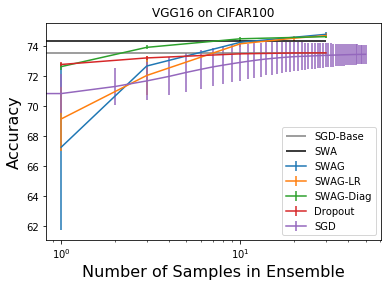

In [16]:
plt.errorbar(swag_cov[:,1].astype(np.int), swag_cov[:,4].astype(np.float), 
             yerr=swag_cov[:,5].astype(np.float), label='SWAG')
plt.errorbar(swaglr_cov[:,1].astype(np.int), swaglr_cov[:,3].astype(np.float), 
             yerr=swaglr_cov[:,4].astype(np.float), label='SWAG-LR')
plt.errorbar(swag_nocov[:,1].astype(np.int), swag_nocov[:,4].astype(np.float), 
             yerr=swag_nocov[:,5].astype(np.float), label='SWAG-Diag')
plt.errorbar(dropout[:,1].astype(np.int), dropout[:,2].astype(np.float),
            yerr=dropout[:,3].astype(np.float), label='Dropout')
plt.errorbar(range(len(sgd_acc)), sgd_acc, yerr=np.sqrt(sgd_var), label='SGD')
#plt.plot(range(1,len(sgd_results)+1), sgd_results, label='SGD-Ensembles')
plt.hlines(73.56, xmin=0, xmax=30, color='grey', label='SGD-Base')
#plt.hlines([93.19+0.22, 93.19-0.22], xmin=0, xmax=100)
plt.hlines(74.3, xmin=0, xmax=30, color='black', label='SWA')
plt.xscale('log')
plt.xlabel('Number of Samples in Ensemble', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend()
plt.title('VGG16 on CIFAR100')
#plt.savefig('../plots/cifar100_bma_accuracy_1214.eps')

In [27]:
long_set2['result']

array([['sgd', '0', 'False', '66.45', '0', '1.7671707557678222', '0'],
       ['swa', '0', 'False', '74.3', '0', '1.2864751192092896', '0'],
       ['swa', '1', 'True', '69.141', '2.106506349385161',
        '1.491372026605606', '0.16066120311384288'],
       ['swa', '1', 'False', '72.66900000000001', '0.15990309565483724',
        '1.3197052219867706', '0.016544231269556356'],
       ['swa', '3', 'True', '72.03099999999999', '1.2780332546534163',
        '1.1105972498989103', '0.044737357250451144'],
       ['swa', '3', 'False', '73.91', '0.2078460969082618',
        '1.1307220286846162', '0.010048271317661691'],
       ['swa', '10', 'True', '74.14099999999999', '0.20901913787976376',
        '0.9883116201782226', '0.02038120483384483'],
       ['swa', '10', 'False', '74.47099999999999', '0.1271573827978542',
        '1.0514170285987856', '0.004194043620468002'],
       ['swa', '20', 'True', '74.51599999999999', '0.16341358572652318',
        '0.9722071056842804', '0.02225296102033586

In [33]:
swaglr_cov[:,3]

array(['69.141', '72.03099999999999', '74.14099999999999',
       '74.51599999999999', '74.681'], dtype='<U21')

In [17]:
sgd_ecdf['result']

array(['VGG16', '160', '74.51', '0.0', '0.9110016433715821', '0.0'],
      dtype='<U18')

In [18]:
sgd_results[0]

66.02

In [7]:
dropout

array([['dropout', '1', '72.76499999999999', '0.14030324301312347',
        '1.710207724571228', '0.0049158609718327724'],
       ['dropout', '3', '73.2', '0.11410521460476815',
        '1.5221967220306396', '0.00991499938527047'],
       ['dropout', '10', '73.473', '0.0960260381354976',
        '1.4329127669334412', '0.0034824434458631537'],
       ['dropout', '20', '73.53', '0.0675277720645374',
        '1.4034072637557984', '0.002923915453231051'],
       ['dropout', '30', '73.53800000000001', '0.05509990925582346',
        '1.393196165561676', '0.002275671995678307']], dtype='<U21')